In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [2]:
batting_df = pd.read_csv('/content/batting_summary.csv')
bowling_df = pd.read_csv('/content/bowling_summary.csv')
match_df   = pd.read_csv('/content/match_schedule_results.csv')
players_df = pd.read_csv('/content/world_cup_players_info.csv')


In [3]:
batting_df.head()
batting_df.info()
batting_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB


,Match_no,Batting_Position,Runs,Balls,4s,6s
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,24.669214,5.398472,26.510917,29.021834,2.533843,0.727074
std,14.042355,3.035952,30.788666,28.493381,3.119120,1.482049
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,5.000000,8.000000,0.000000,0.000000
50%,25.000000,5.000000,15.000000,19.000000,1.000000,0.000000
75%,37.000000,8.000000,38.000000,40.250000,4.000000,1.000000
max,48.000000,11.000000,201.000000,143.000000,21.000000,11.000000


In [4]:
bowling_df.head()
bowling_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match_no       574 non-null    int64  
 1   Match_Between  574 non-null    object 
 2   Bowling_Team   574 non-null    object 
 3   Bowler_Name    574 non-null    object 
 4   Overs          574 non-null    float64
 5   Maidens        574 non-null    int64  
 6   Runs           574 non-null    int64  
 7   Wickets        574 non-null    int64  
 8   Economy        574 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 40.5+ KB


In [5]:
match_df.head()
match_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [6]:
players_df.head()
players_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      151 non-null    object
 1   team_name        151 non-null    object
 2   image_of_player  85 non-null     object
 3   battingStyle     151 non-null    object
 4   bowlingStyle     145 non-null    object
 5   playingRole      151 non-null    object
 6   description      134 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


In [18]:
# batting_df.isnull().sum()

# bowling_df.isnull().sum()
# match_df.isnull().sum()
players_df.isnull().sum()

,0
player_name,0
team_name,0
image_of_player,66
battingStyle,0
bowlingStyle,6
playingRole,0
description,17


In [19]:
players_df['image_of_player'].fillna('Not Available', inplace=True)
players_df['bowlingStyle'].fillna('Not Available', inplace=True)
players_df['description'].fillna('Not Available', inplace=True)


/tmp/ipython-input-481758047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players_df['image_of_player'].fillna('Not Available', inplace=True)
/tmp/ipython-input-481758047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [20]:
players_df.isnull().sum()


,0
player_name,0
team_name,0
image_of_player,0
battingStyle,0
bowlingStyle,0
playingRole,0
description,0


In [21]:
batting_df['Strike_Rate'] = pd.to_numeric(
    batting_df['Strike_Rate'],
    errors='coerce'
)


In [22]:
batting_df.drop_duplicates(inplace=True)
bowling_df.drop_duplicates(inplace=True)
match_df.drop_duplicates(inplace=True)
players_df.drop_duplicates(inplace=True)


In [23]:
top_scorers = (
    batting_df
    .sort_values(['Match_no', 'Runs'], ascending=[True, False])
    .groupby('Match_no')
    .first()
    .reset_index()
)

top_scorers[['Match_no', 'Batsman_Name', 'Runs']]


,Match_no,Batsman_Name,Runs
0,1,Devon Conway,152
1,2,Mohammad Rizwan,68
2,3,Najmul Hossain Shanto,59
3,4,Rassie van der Dussen,108
4,5,KL Rahul,97
5,6,Will Young,70
6,7,Dawid Malan,140
7,8,Mohammad Rizwan,131
8,9,Rohit Sharma,131
9,10,Quinton de Kock,109


In [24]:
top_scorer_counts = (
    top_scorers['Batsman_Name']
    .value_counts()
    .reset_index()
)

top_scorer_counts.columns = ['Player', 'Times_Top_Scorer']
top_scorer_counts.head(10)


,Player,Times_Top_Scorer
0,Rohit Sharma,3
1,Daryl Mitchell,3
2,Quinton de Kock,3
3,Ben Stokes,2
4,Mohammad Rizwan,2
5,Virat Kohli,2
6,Scott Edwards,2
7,Kusal Janith Perera,2
8,Rassie van der Dussen,2
9,Fakhar Zaman,2


In [25]:
best_bowlers = (
    bowling_df
    .sort_values(['Match_no', 'Wickets', 'Economy'], ascending=[True, False, True])
    .groupby('Match_no')
    .first()
    .reset_index()
)

best_bowlers[['Match_no', 'Bowler_Name', 'Wickets']]


,Match_no,Bowler_Name,Wickets
0,1,Matt Henry,3
1,2,Bas de Leede,4
2,3,Mehidy Hasan Miraz,3
3,4,Gerald Coetzee,3
4,5,Ravindra Jadeja,3
5,6,Mitchell Santner,5
6,7,Reece Topley,4
7,8,Hasan Ali,4
8,9,Jasprit Bumrah,4
9,10,Kagiso Rabada,3


In [26]:
best_bowler_counts = (
    best_bowlers['Bowler_Name']
    .value_counts()
    .reset_index()
)

best_bowler_counts.columns = ['Player', 'Times_Best_Bowler']
best_bowler_counts.head(10)


,Player,Times_Best_Bowler
0,Gerald Coetzee,4
1,Mohammed Shami,4
2,Adam Zampa,3
3,Ravindra Jadeja,3
4,Jasprit Bumrah,3
5,Lockie Ferguson,2
6,Dilshan Madushanka,2
7,Shaheen Afridi,2
8,Mitchell Starc,2
9,Reece Topley,1


In [27]:
venue_batting = (
    batting_df
    .merge(match_df[['Match_no', 'Venue']], on='Match_no')
    .groupby('Venue')['Runs']
    .mean()
    .reset_index()
    .sort_values(by='Runs', ascending=False)
)

venue_batting.head()


,Venue,Runs
10,Pune,30.273810
9,Mumbai,30.208791
1,Bengaluru,29.807229
7,Hyderabad,28.448276
3,Delhi,28.400000


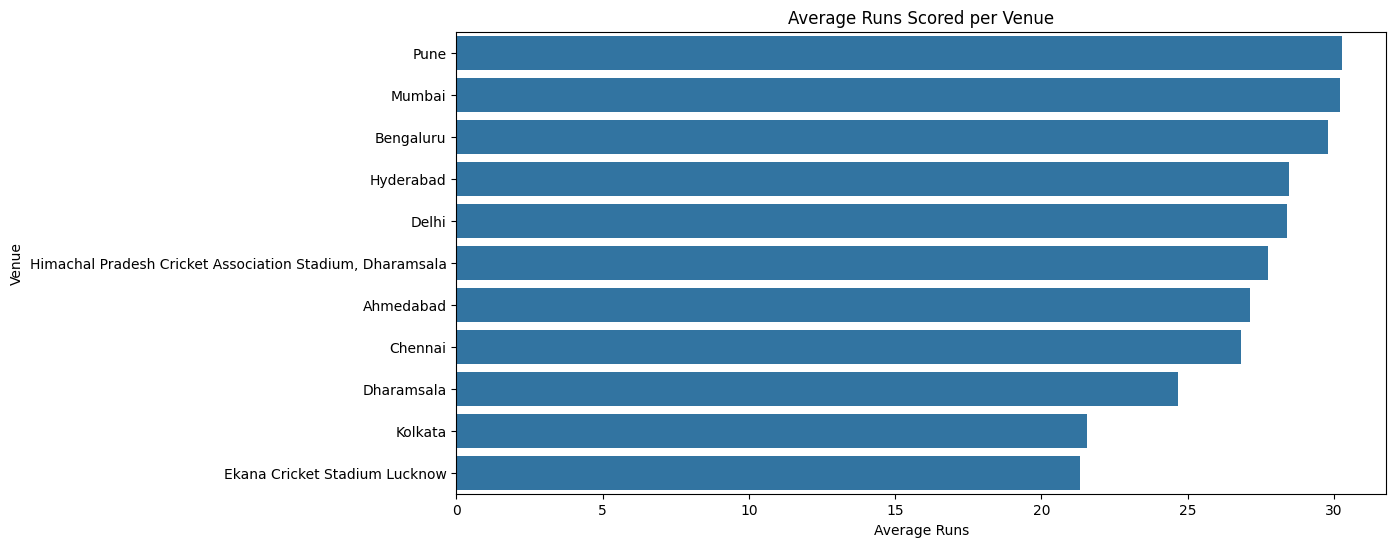

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=venue_batting, x='Runs', y='Venue')
plt.title('Average Runs Scored per Venue')
plt.xlabel('Average Runs')
plt.ylabel('Venue')
plt.show()


In [29]:
top_players = pd.concat([
    top_scorers[['Batsman_Name']].rename(columns={'Batsman_Name':'Player'}),
    best_bowlers[['Bowler_Name']].rename(columns={'Bowler_Name':'Player'})
])

top_players['Player'].value_counts().head(10)


,count
Player,
Mohammed Shami,4
Gerald Coetzee,4
Rohit Sharma,3
Quinton de Kock,3
Ravindra Jadeja,3
Adam Zampa,3
Daryl Mitchell,3
Jasprit Bumrah,3
Glenn Phillips,2


In [30]:
player_role_analysis = (
    top_players
    .merge(players_df, left_on='Player', right_on='player_name', how='left')
)


In [31]:
role_distribution = (
    player_role_analysis['playingRole']
    .value_counts()
    .reset_index()
)

role_distribution.columns = ['Role', 'Count']
role_distribution


,Role,Count
0,Bowler,35
1,Top order Batter,18
2,Allrounder,14
3,Wicketkeeper Batter,12
4,Opening Batter,6
5,Batting Allrounder,5
6,,3
7,Bowling Allrounder,2
8,Middle order Batter,1


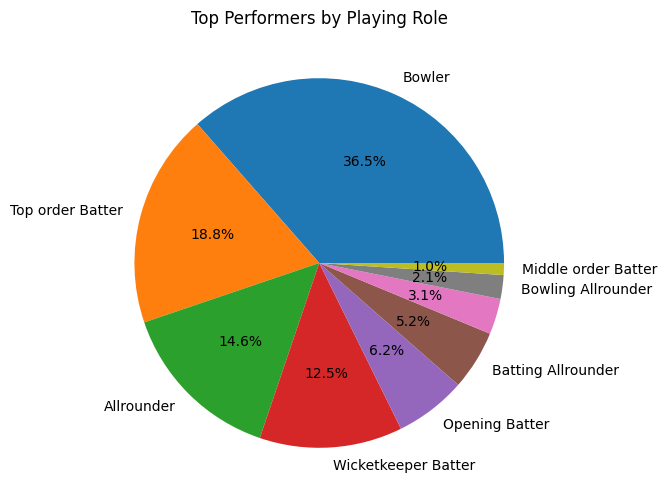

In [32]:
plt.figure(figsize=(6,6))
plt.pie(role_distribution['Count'],
        labels=role_distribution['Role'],
        autopct='%1.1f%%')
plt.title('Top Performers by Playing Role')
plt.show()


In [33]:
team_runs = (
    batting_df
    .groupby('Team_Innings')['Runs']
    .sum()
    .reset_index()
    .sort_values(by='Runs', ascending=False)
)

team_runs.head()


,Team_Innings,Runs
1,Australia,3303
8,South Africa,3272
4,India,3038
6,New Zealand,2712
7,Pakistan,2220


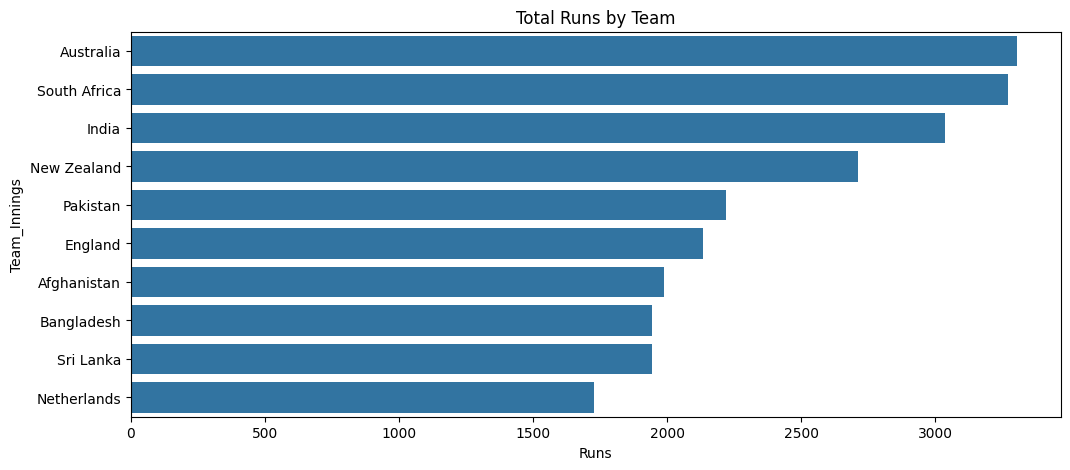

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(data=team_runs, x='Runs', y='Team_Innings')
plt.title('Total Runs by Team')
plt.show()


In [35]:
match_results = (
    match_df['Winner']
    .value_counts()
    .reset_index()
)

match_results.columns = ['Team', 'Wins']
match_results


,Team,Wins
0,Australia,9
1,India,9
2,South Africa,7
3,New Zealand,5
4,Pakistan,4
5,Afghanistan,4
6,Sri Lanka,3
7,England,3
8,Bangladesh,2
9,Netherlands,2
